# Tutorial 2 - Covariance and Principle Components

In this tutorial we will get some experience with estimating the covariance matrix and finding principle components of some data. 

An estimator for the covariance matrix between variables $x$ and $y$ is
\begin{align}
\hat{C}_{xy} = \frac{1}{N-1} \sum_{i=1}^N \left( x_i - \bar{x} \right) \left( y_i - \bar{y} \right)
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i
\end{align}



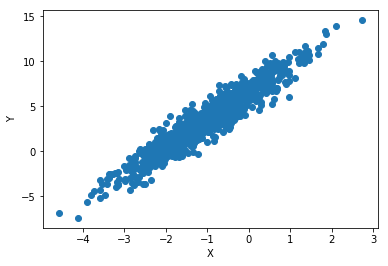

In [30]:
## You will need to import numpy, matplotlib.pyplot and pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pa


# 1) Read file homework_01_2d-datafile.csv into a dataframe using pandas

    
df = pa.read_csv('/Users/bmetcalf/Papers/StatsCourse/CoursePage/tutorials/homework_01_2d-datafile.csv')

   # make a scatter plot of X vs Y
 
plt.scatter(df['X'],df['Y'])
plt.xlabel('X')
plt.ylabel('Y')           
plt.show()



In [14]:
# 2) Find the covariance matrix for the two variables.  Use the function numpy.cov() or 
# write your own function.   Print the covariace matrix for X and Y.

C = np.cov(df['X'],df['Y'])

print C

# Do X and Y appear to be correlated?

[[ 1.04991622  3.14373697]
 [ 3.14373697 10.44232481]]


In [28]:

# 3) Decompose the covariance matrix using an eigenvalue decompositions.
#  Use w,v = numpy.linalg.eig() to find the decomposition.

w,v = np.linalg.eig(C)

    # What are the principle components (eigenvectors) of the data? 

print v

    # What are the variances of each principle component?

print w


X = df['X']
Y = df['Y']

print np.shape(np.array([X,Y]))


data = np.array([X,Y])


[[-0.95681567 -0.29069531]
 [ 0.29069531 -0.95681567]]
[ 0.09480059 11.39744044]
(2, 1000)


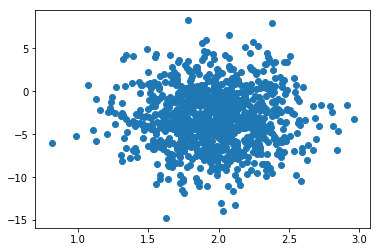

[[ 9.48005856e-02 -1.33982470e-15]
 [-1.33982470e-15  1.13974404e+01]]


In [29]:
# 4) Transform the data into the basis of the principle components (or eigenvectors) that 
#  were found in 3).
#  The columns of v above are the eigenvectors.  You can collect the data into a 
#  structure data = np.array([X,Y]) and then matrix multiply it by a matrix with np.dot(,)
#  (You might need to transpose something...).  numpy.shape() is useful to make sure your 
#  doing matrix multiplications correctly.

data = np.dot(np.transpose(v),data) 

# make a scatter plot of the data in this basis

plt.scatter( data[0,:], data[1,:])
plt.show()

# print the covariance matrix of the data in this basis

print np.cov(data)

# The new X and Y should not be correlated.

In [ ]:
# 4) Do 1) through 4), but using the data file homework_01_5d-datafile.csv this time.
#    In this case the data is 5 dimensional.  Don't put the scatter plots in.

    # Which variables seem to be correlated with each other and which ones not?

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).









##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?

